In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [63]:
data=pd.read_csv('weatherHistory.csv')
data_date=data['Formatted Date']
data_temperature=data['Temperature (C)']

In [64]:
class GenerateData:
    def __init__(self,date,temperature):
        self.date=date
        self.temperature=temperature
        
    def dayOfYear(self):
        new_date=[]
        for d in self.date:
            period = pd.Period(d, freq='H')
            new_date.append(period.day_of_year)
        new_date=np.array(new_date)
        
        day_of_year=[]
        for k in range(0,len(new_date),24):
            day_of_year.append(new_date[k])
        day_of_year=np.array(day_of_year)
        day_of_year=day_of_year.reshape(4019,1)
        return new_date,day_of_year
    
    def averageOfTemperature(self):
        new_date,day_of_year=self.dayOfYear()
        avg=[]
        for i in range(0,len(new_date),24):
            avg.append(np.mean(self.temperature[i:i+24]))
        avg=np.array(avg)
        avg=avg.reshape(4019,1)
        return avg
    def plotData(self):
        new_date,day_of_year=self.dayOfYear()
        avg=self.averageOfTemperature()
        plt.figure(figsize=(16,6))
        plt.scatter(day_of_year,avg,c='magenta')
        

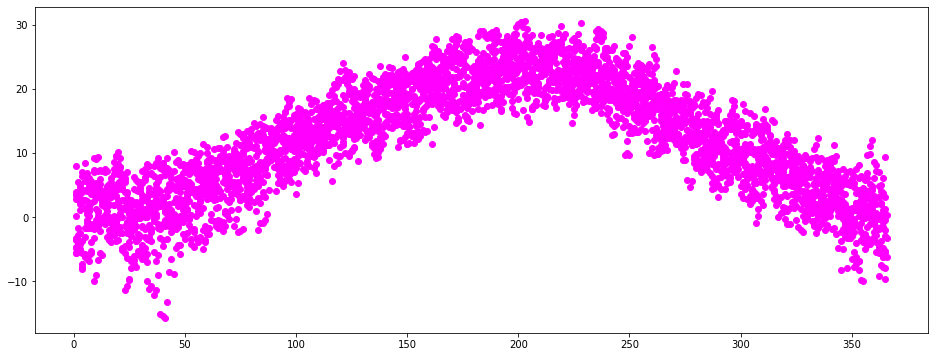

In [65]:
model=GenerateData(data_date,data_temperature)
model.plotData()

In [89]:
class perceptron:
    def __init__(self):
        self.w=np.random.rand(1,1)
        self.b=np.random.rand(1,1)

    def fit(self,lrate,ep,X,Y):
        lr=lrate
        epochs=ep
        errors=[]
        for j in range(epochs):
            for i in range(len(X)):
                y_pred=np.matmul(X[i],self.w)+self.b
                e=Y[i]-y_pred

                Y_pred = np.matmul(X, self.w)+self.b
                error = np.mean(np.abs(Y- Y_pred))
                errors.append(error)

                self.w += lr * X[i]* e
                self.b+=lr*e
        return Y_pred,errors
            
    def plotP(self,Y_pred,errors,X,Y):
        
        fig1, (ax1, ax2) = plt.subplots(1, 2)
        ax1.clear()
        ax1.scatter(X,Y,c='magenta')
        ax1.plot(X,Y_pred,c='blue',lw=2)

        ax2.clear()
        ax2.set_title('Loss')
        ax2.plot(errors,lw=1)
        plt.pause(0.001)
    
    
    def predict(self,X):
        Y=np.matmul(X,self.w)+self.b
        return Y
    
    def evaluate_MAE(self,X_test,Y_test):
        Y_pred=np.matmul(X_test, self.w)+self.b
        subtract=np.abs(Y_test-Y_pred)
        avg=np.mean(subtract)
        return avg
    
    def evaluate_MSE(self,X_test,Y_test):
        Y_pred=np.matmul(X_test, self.w)+self.b
        subtract=np.square(Y_test-Y_pred)
        avg=np.mean(subtract)
        return avg
        
        

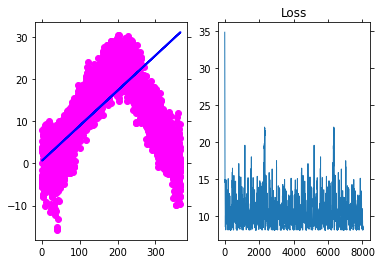

In [90]:
model=GenerateData(data_date,data_temperature)
_,day_of_year=model.dayOfYear()
avg=model.averageOfTemperature()
prc=perceptron()
Y_pred,errors=prc.fit(0.00001,2,day_of_year,avg)
prc.plotP(Y_pred,errors,day_of_year,avg)

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(day_of_year, avg, test_size=0.2)

Y_pred,errors=prc.fit(0.00001,3,X_train,Y_train)
# prc.plotP(Y_pred,errors,X_train,Y_train)


In [94]:
y=prc.predict(X_test)
# print('y :',y)
mae=prc.evaluate_MAE(X_test,Y_test)
mse=prc.evaluate_MSE(X_test,Y_test)
print('mae: ',mae,'mse: ',mse)

mae:  9.840390921807083 mse:  140.94247302743608
